In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset

In [3]:
import pandas as pd

# Data for the CSV file
data = {
    'Feature 1': [2.0, 3.0, 3.5, 8.0, 8.5, 9.0, 1.0, 1.5],
    'Feature 2': [3.0, 3.5, 3.0, 8.0, 8.5, 8.0, 2.0, 2.5],
    'Feature 3': [1.5, 2.0, 2.5, 7.5, 8.0, 8.5, 1.0, 1.5]
}

# Create DataFrame
df = pd.DataFrame(data)
df

,Feature 1,Feature 2,Feature 3
0,2.0,3.0,1.5
1,3.0,3.5,2.0
2,3.5,3.0,2.5
3,8.0,8.0,7.5
4,8.5,8.5,8.0
5,9.0,8.0,8.5
6,1.0,2.0,1.0
7,1.5,2.5,1.5


In [5]:
df.shape

(8, 3)

# K-Mean Clustering

In [28]:
class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k                   # Number of clusters
        self.max_iters = max_iters   # Maximum number of iterations
        self.centroids = None        # Coordinates of centroids
        self.clusters = None         # Cluster assignment for each data point

    def initialize_centroids(self, data):
        """
        Initialize centroids randomly
        Parameters:
            data (numpy.ndarray): Input data to be clustered

        Return:
            None
        """
        np.random.seed(42)
        self.centroids = data[np.random.choice(data.shape[0], self.k, replace=False)]

    def euclidean_distance(self, x1, x2):
        """Calculate the Euclidean distance between two data points
        Parameters:
            x1 (numpy.ndarray): Data point 1
            x2 (numpy.ndarray): Data point 2
        Return:
            float: Euclidean distance
        """
        return np.sqrt(np.sum(np.power(x1 - x2, 2)))

    def assign_clusters(self, data):
        """
        Cluster the data
        Parameters:
            data (numpy.ndarray): Input data to be clustered
        Return:
            numpy.ndarray: Array containing the cluster of each data point
        """

        # Calculate the distance between each data point and the centroids using the euclidean_distance function
        distances = np.array([[self.euclidean_distance(x, centroid) for centroid in self.centroids] for x in data])

        # print(np.argmin(distances, axis=1)) # You can print this line to see how the array containing allocation is represented
        return np.argmin(distances, axis=1)

    def update_centroids(self, data):
        """
        Update the centroids
        Parameters:
            data (numpy.ndarray): Input data to be clustered
        Return:
            numpy.ndarray: Array containing the new centroids
        """
        return np.array([data[self.clusters == i].mean(axis=0) for i in range(self.k)])

    def fit(self, data):
        """
        Training function
        Parameters:
            data (numpy.ndarray): Input data to be clustered
        Return:
            None
        """
        # Call the method to initialize centroids randomly
        self.initialize_centroids(data)
        self.plot_clusters(data, 0)

        for i in range(self.max_iters):
            # Assign clusters to the nearest data points
            self.clusters = self.assign_clusters(data)

            # Visualize the clusters and centroids at this iteration
            self.plot_clusters(data, i)

            # Move the centroids to the mean position of each cluster based on data points
            new_centroids = self.update_centroids(data)

            # Stop if centroids do not move
            if np.all(self.centroids == new_centroids):
                break

            # If centroids have moved, repeat the loop with new centroid values
            self.centroids = new_centroids
            self.plot_clusters(data, i)

        # Plot the final result of clusters and centroids
        self.plot_final_clusters(data)


    def plot_clusters(self, data, iteration):
        """
        Plot the clusters and centroids at each iteration
        Parameters:
            data (numpy.ndarray): Input data to be clustered
            iteration (int): Current iteration
        Return:
            None
        """
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        ax.scatter(self.centroids[:, 0], self.centroids[:, 1], self.centroids[:, 2], s=300, c='red', marker='x')
        plt.title(f"Iteration {iteration + 1}")
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_zlabel('Feature 3')
        plt.show()

    def plot_final_clusters(self, data):
        """
        Plot the final clusters and centroids
        Parameters:
            data (numpy.ndarray): Input data to be clustered
        Return:
            None
        """
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        ax.scatter(self.centroids[:, 0], self.centroids[:, 1], self.centroids[:, 2], s=300, c='red', marker='x')
        plt.title("Final Clusters and Centroids")
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_zlabel('Feature 3')
        plt.show()

## Calculate the Euclid distance

In [19]:
datapoint = np.array([2.0, 3.0, 1.5])
centroid = np.array([8.0, 8.0, 7.5])
K_mean_model = KMeans()
K_mean_model.euclidean_distance(datapoint, centroid)

9.848857801796104

In [20]:
centroid_1 = np.array([2.0, 3.0, 1.5])
centroid_2 = np.array([1.0, 2.0, 1.0])
datapoint = np.array([3.0, 3.5, 2.0])
belong_to_1 = K_mean_model.euclidean_distance(datapoint, centroid_1)
belong_to_2 = K_mean_model.euclidean_distance(datapoint, centroid_2)
print(belong_to_1)
print(belong_to_2)

1.224744871391589
2.692582403567252


In [26]:
df = pd.DataFrame(data)
data_array = df.to_numpy()
data_array

array([[2. , 3. , 1.5],
       [3. , 3.5, 2. ],
       [3.5, 3. , 2.5],
       [8. , 8. , 7.5],
       [8.5, 8.5, 8. ],
       [9. , 8. , 8.5],
       [1. , 2. , 1. ],
       [1.5, 2.5, 1.5]])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2408\918085199.py:100: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)


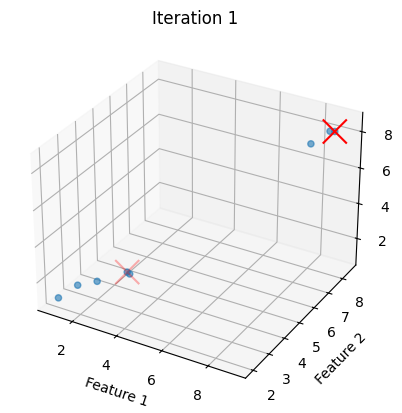

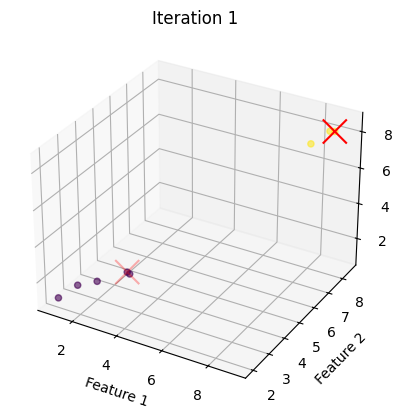

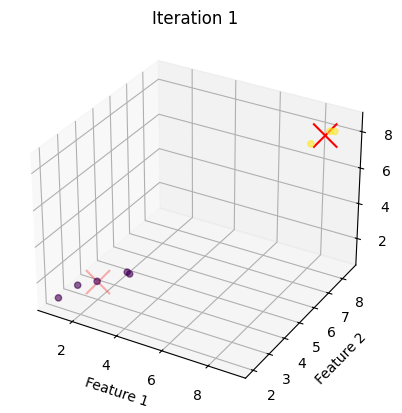

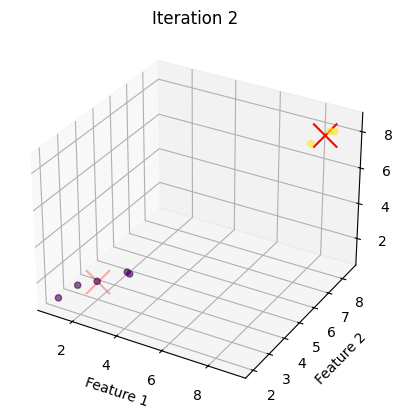

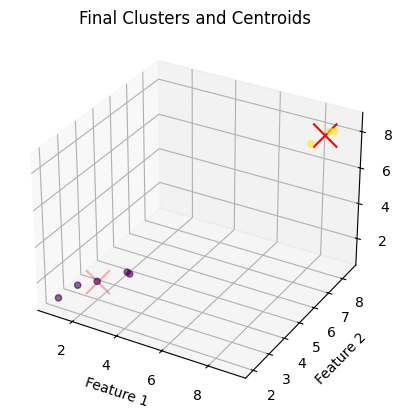

In [31]:
K_mean_model = KMeans(k=2)
K_mean_model.fit(data_array)

## Change KMEANS to adapt to k==3

In [36]:
class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.clusters = None

    def initialize_centroids(self, data):
        np.random.seed(42)
        self.centroids = data[np.random.choice(data.shape[0], self.k, replace=False)]

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum(np.power(x1 - x2, 2)))

    def assign_clusters(self, data):
        distances = np.array([[self.euclidean_distance(x, centroid) for centroid in self.centroids] for x in data])
        return np.argmin(distances, axis=1)

    def update_centroids(self, data):
        return np.array([data[self.clusters == i].mean(axis=0) for i in range(self.k)])

    def fit(self, data):
        self.initialize_centroids(data)

        for i in range(self.max_iters):
            self.clusters = self.assign_clusters(data)
            new_centroids = self.update_centroids(data)

            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

        return self.centroids

kmeans = KMeans(k=3)
centroids = kmeans.fit(data_array)
print("Final Centroids:\n", centroids)

Final Centroids:
 [[3.25       3.25       2.25      ]
 [8.5        8.16666667 8.        ]
 [1.5        2.5        1.33333333]]
